<a href="https://colab.research.google.com/github/mervenurerdogan/CA_NORMAL/blob/main/CA_NORMAL_VIT_JPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq timm


     |████████████████████████████████| 549 kB 15.3 MB/s 
     |████████████████████████████████| 182 kB 66.0 MB/s 


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 14.4 MB/s 
     |████████████████████████████████| 1.3 MB 57.1 MB/s 
     |████████████████████████████████| 451 kB 68.5 MB/s 
     |████████████████████████████████| 5.5 MB 49.7 MB/s 
     |████████████████████████████████| 1.6 MB 56.2 MB/s 
     |████████████████████████████████| 115 kB 62.9 MB/s 
     |████████████████████████████████| 212 kB 68.3 MB/s 
     |████████████████████████████████| 127 kB 52.3 MB/s 
     |████████████████████████████████| 7.6 MB 9.9 MB/s 
Mounted at /content/gdrive


In [ ]:
import timm
from fastbook import *
from fastai.vision.all import *

In [ ]:
path=Path('/content/gdrive/MyDrive/LUNG_DATA_JPG/Lung_CA_NORMAL_JPG')


In [ ]:
path.ls()


(#3) [Path('/content/gdrive/MyDrive/LUNG_DATA_JPG/Lung_CA_NORMAL_JPG/Train'),Path('/content/gdrive/MyDrive/LUNG_DATA_JPG/Lung_CA_NORMAL_JPG/Test'),Path('/content/gdrive/MyDrive/LUNG_DATA_JPG/Lung_CA_NORMAL_JPG/Valid')]

In [ ]:
train_fnames=get_image_files(path/'Train')
all_files=get_image_files(path)

In [ ]:
from fastai.vision.augment import contrast
tfms = aug_transforms(size=224, 
                      min_scale=0.75,
                      do_flip=True,
                      flip_vert=True,
                      max_rotate=360,
                      max_warp=0,
                      max_zoom=1.1,
                      max_lighting=0.1,
                      p_lighting=0.5
                      
                      
                      )

In [ ]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='Train',valid_name='Valid'),
                 get_y=parent_label,
                 item_tfms=Resize(224,method='squish'),
                 batch_tfms=tfms
                 
                 
)

In [ ]:
dls=dblock.dataloaders(all_files,bs=16)


In [ ]:
train_df = len(train_fnames)
print(f"There are {train_df} images")

There are 4129 images


In [ ]:
valid_fnames=get_image_files(path/'Valid')
valid_df = len(valid_fnames)
print(f"There are {valid_df} images")

There are 500 images


In [ ]:
test_fnames=get_image_files(path/'Test')
test_df = len(test_fnames)
print(f"There are {test_df} images")

There are 529 images


In [ ]:
dls.c,len(dls.train_ds),len(dls.valid_ds)


(2, 4129, 500)

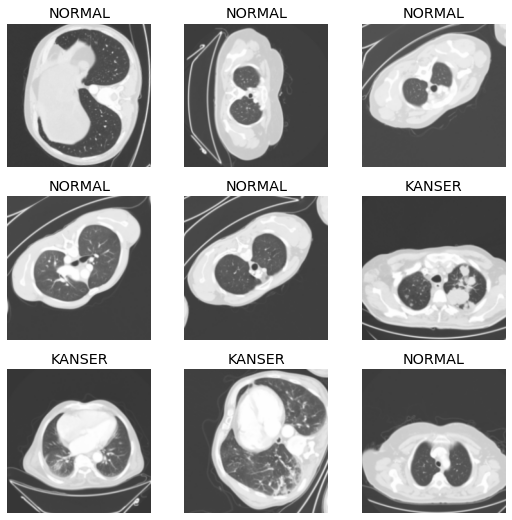

In [ ]:
dls.show_batch()


In [ ]:
learn = vision_learner(dls,'vit_small_patch32_224',  metrics=accuracy)


In [ ]:
learn.summary()


Sequential (Input shape: 16 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 384 x 7 x 7    
Conv2d                                    1180032    False     
Identity                                                       
Dropout                                                        
Identity                                                       
LayerNorm                                 768        True      
____________________________________________________________________________
                     16 x 50 x 1152      
Linear                                    443520     False     
Dropout                                                        
Linear                                    147840     False     
Dropout                                                        
Identity                                                       
Identity                                                       
LayerNorm                 

SuggestedLRs(valley=0.002511886414140463)

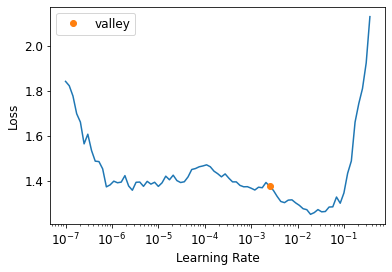

In [ ]:
learn.lr_find()


In [ ]:
learn.fine_tune(40,1e-3)


epoch,train_loss,valid_loss,accuracy,time
0,0.709321,0.426382,0.812000,09:41


epoch,train_loss,valid_loss,accuracy,time
0,0.527303,0.433562,0.806000,01:19
1,0.456544,0.519876,0.792000,01:18
2,0.441097,0.427026,0.822000,01:18
3,0.412687,0.460897,0.818000,01:20
4,0.363283,0.457603,0.812000,01:17
5,0.353331,0.366407,0.840000,01:18
6,0.279352,0.303970,0.868000,01:20
7,0.259764,0.233287,0.906000,01:18
8,0.239550,0.494234,0.818000,01:17
9,0.238172,0.207373,0.910000,01:20


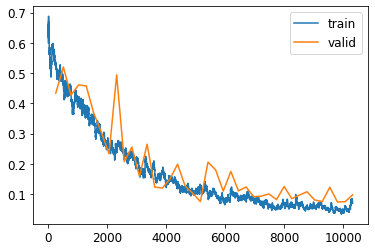

In [ ]:
learn.recorder.plot_loss()


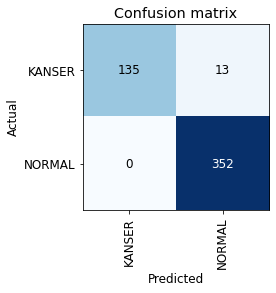

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()


              precision    recall  f1-score   support

      KANSER       1.00      0.91      0.95       148
      NORMAL       0.96      1.00      0.98       352

    accuracy                           0.97       500
   macro avg       0.98      0.96      0.97       500
weighted avg       0.97      0.97      0.97       500



In [ ]:
preds, targs = learn.tta()
accuracy(preds, targs).item()

0.9800000190734863

In [ ]:
interp.most_confused()


[('KANSER', 'NORMAL', 13)]

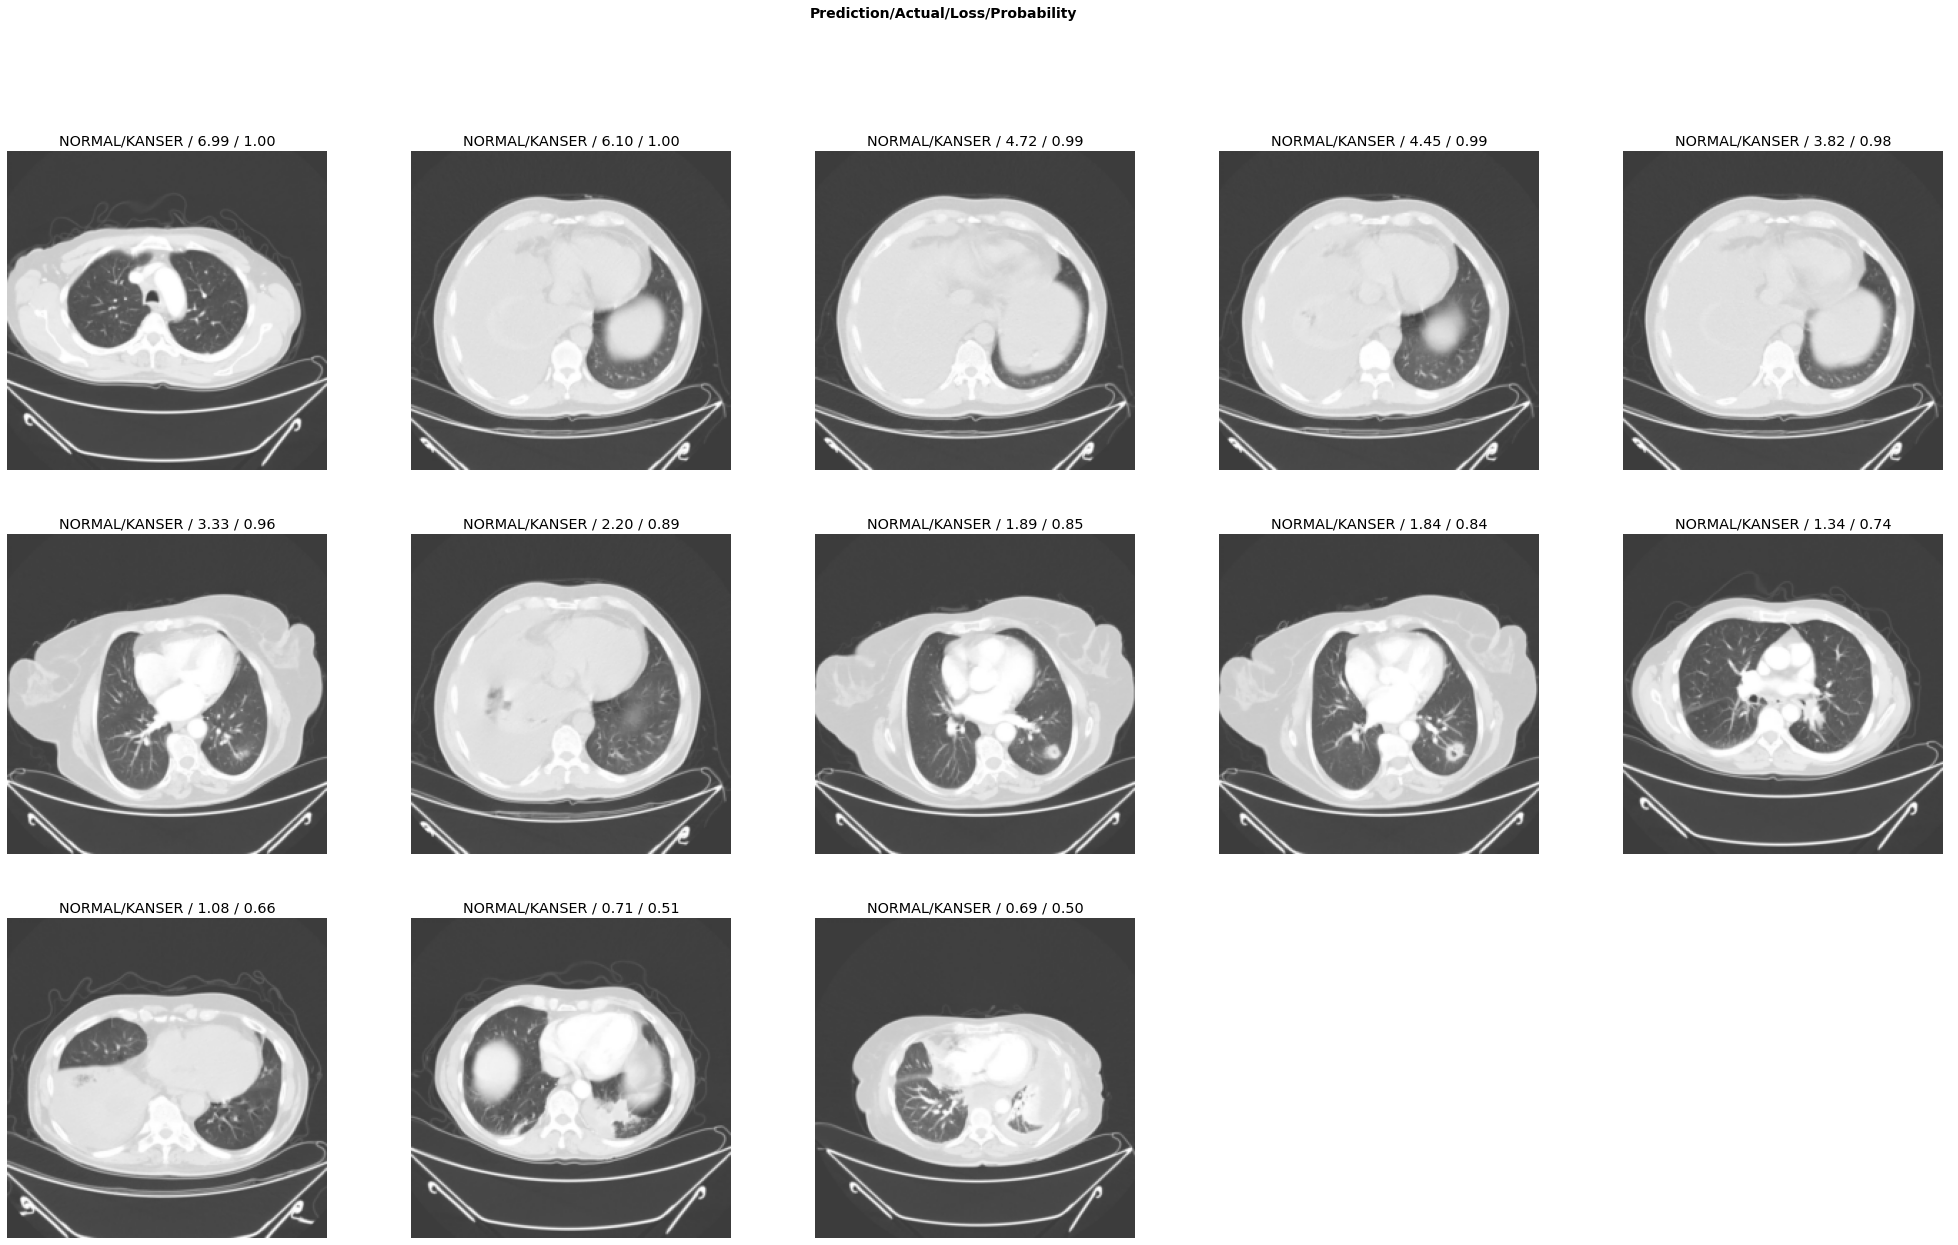

In [ ]:
interp.plot_top_losses(13, figsize=(35,20))


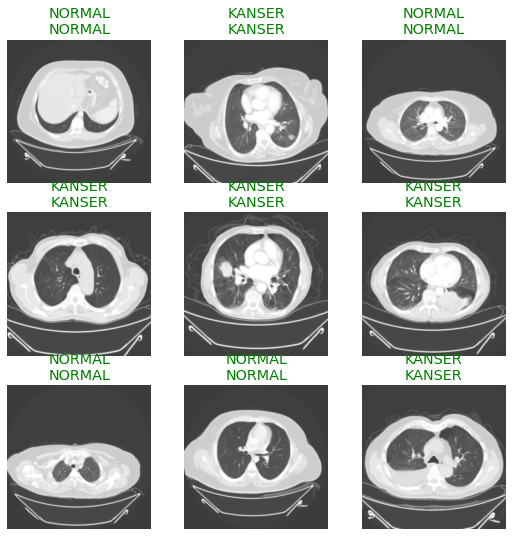

In [ ]:
learn.show_results()


In [ ]:
learn.save(path/'CA_Normal_Vit_Train_JPG')


Path('/content/gdrive/MyDrive/LUNG_DATA_JPG/Lung_CA_NORMAL_JPG/CA_Normal_Vit_Train_JPG.pth')

In [ ]:
learn.export(path/'CA_Normal_Vit_Train_JPG_Exp.pkl')


In [ ]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='Train',valid_name='Test'),
                 get_y=parent_label,
                 item_tfms=Resize(224,method='squish'),
                 batch_tfms=tfms
                 
                 
)

In [ ]:
dls_test = dblock.dataloaders(all_files)


In [ ]:
learn1= learn = vision_learner(dls_test,'vit_small_patch32_224',  metrics=accuracy).load('/content/gdrive/MyDrive/LUNG_DATA_JPG/Lung_CA_NORMAL_JPG/CA_Normal_Vit_Train_JPG')


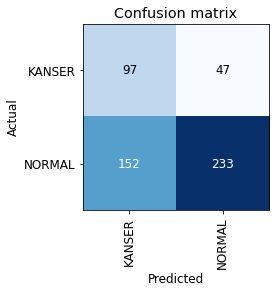

In [ ]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [42]:
interp.print_classification_report()


              precision    recall  f1-score   support

      KANSER       0.39      0.67      0.49       144
      NORMAL       0.83      0.61      0.70       385

    accuracy                           0.62       529
   macro avg       0.61      0.64      0.60       529
weighted avg       0.71      0.62      0.64       529



In [ ]:
preds, targs = learn1.tta()
accuracy(preds, targs).item()

0.7240075469017029